In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from constrains import SELECTED_TYPES, ALL_TYPES

In [2]:
df_map = pd.read_csv('/data/images_gz2/gz2_filename_mapping.csv')
df_classes = pd.read_csv('/data/images_gz2/gz2_hart16.csv')
df_classes = df_classes.rename(columns={'dr7objid':'objid'})
df_selected = df_classes[SELECTED_TYPES]
df_classes = df_classes[ALL_TYPES]

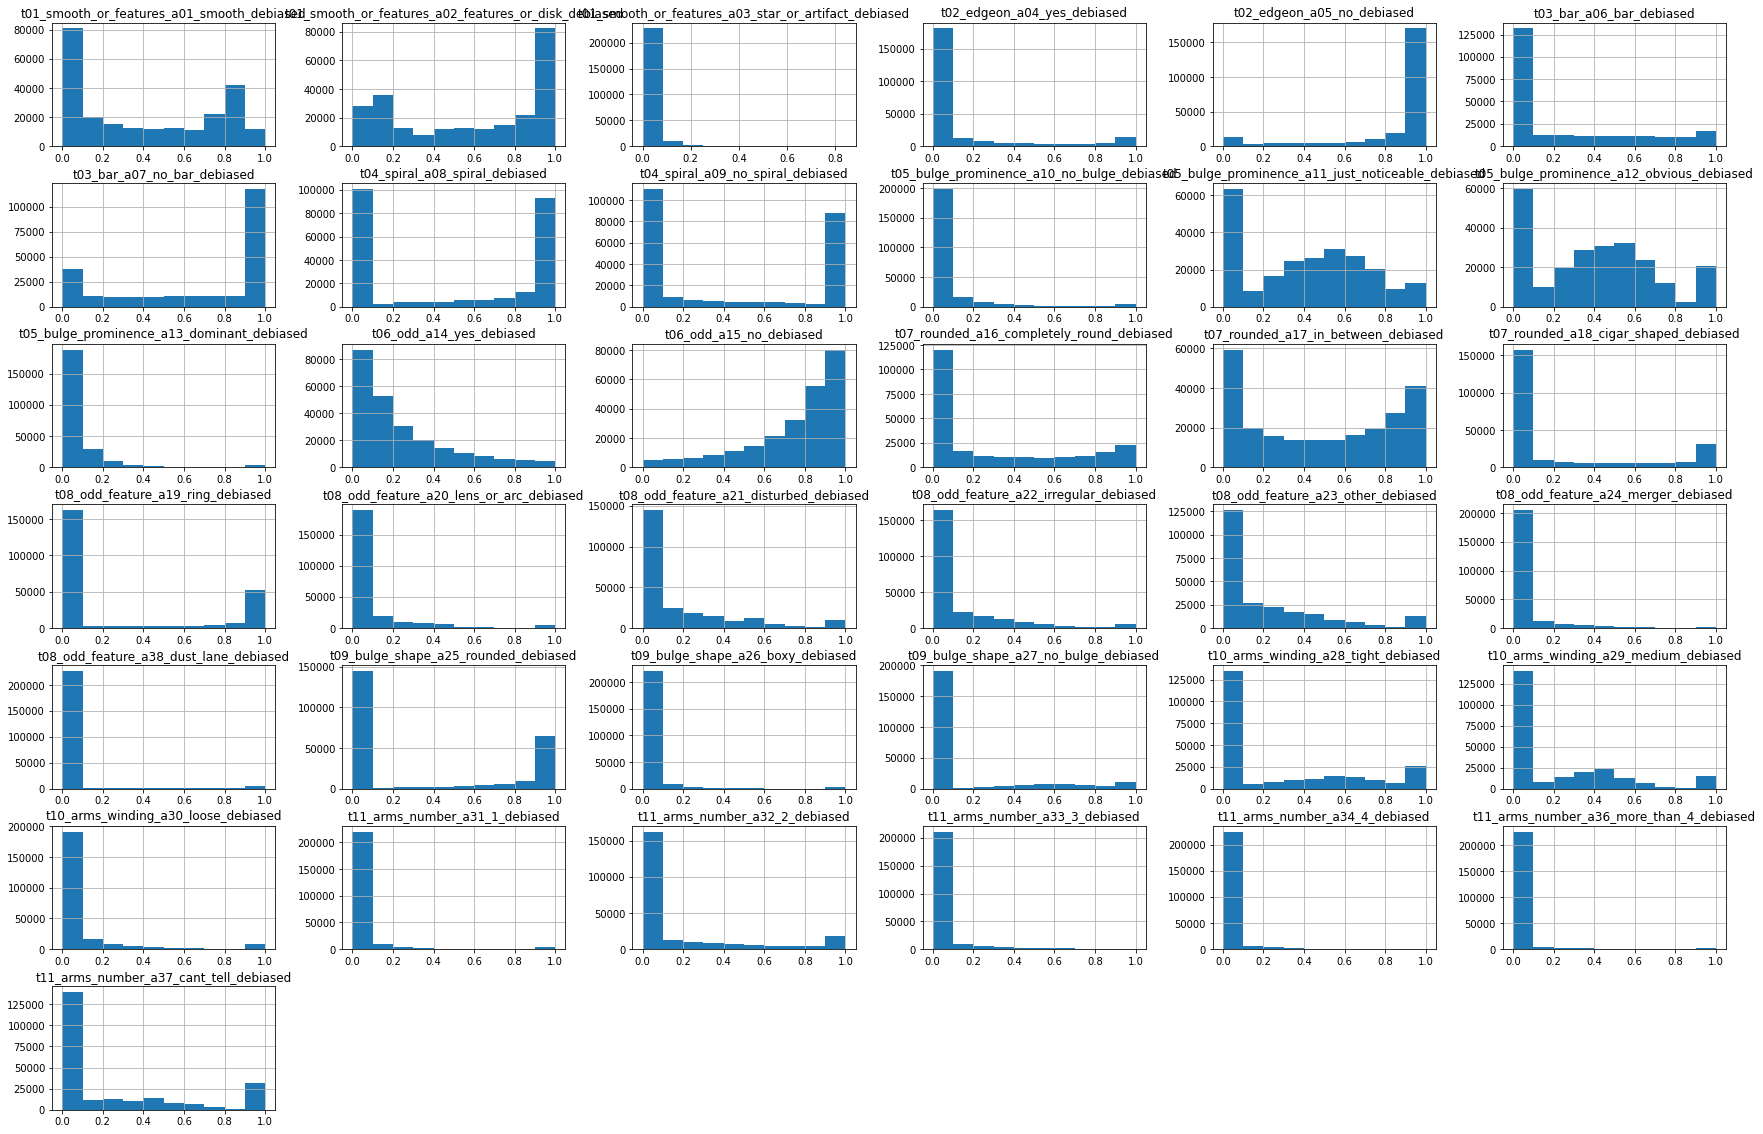

In [3]:
graph = df_classes.hist(bins=10, figsize=(30, 20))
plt.savefig("/data/plots/histogram_galaxy_type_02/all_galaxy_types_2.jpg", bbox_inches='tight', dpi=100)
plt.show()

In [ ]:

for galaxy_type in ALL_TYPES:
    fig = plt.figure()
    plt.title(label=galaxy_type, fontsize=15, color="green")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    df_classes[galaxy_type][df_classes[galaxy_type] > .2].hist(bins=16, figsize=(12, 10))
    fig.savefig("/data/plots/histogram_galaxy_type_02/" + galaxy_type + ".jpg", bbox_inches='tight')

In [5]:
print(df_selected['objid'].count())
df_selected

239695


,objid,total_votes,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t05_bulge_prominence_a10_no_bulge_debiased,t05_bulge_prominence_a11_just_noticeable_debiased,t05_bulge_prominence_a12_obvious_debiased,t05_bulge_prominence_a13_dominant_debiased,t07_rounded_a16_completely_round_debiased,t07_rounded_a17_in_between_debiased,...,t09_bulge_shape_a25_rounded_debiased,t09_bulge_shape_a26_boxy_debiased,t09_bulge_shape_a27_no_bulge_debiased,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased
0,587732591714893851,342,0.000,0.988,0.050,0.600973,0.344974,0.000000,0.000000,0.000000,...,0.497192,0.495764,0.0,0.676487,0.301320,0.025,0.0,0.075071,0.024617,0.049583
1,588009368545984617,332,0.024,0.976,0.000,0.298106,0.452623,0.249000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.871056,0.080068,0.050,0.0,0.098063,0.049983,0.024977
2,587732484359913515,125,0.780,0.139,0.000,0.000000,0.798768,0.198686,0.178759,0.820752,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000
3,587741723357282317,218,0.036,0.964,0.077,0.615067,0.268757,0.038000,1.000000,0.000000,...,0.000000,0.000000,1.0,0.640306,0.319844,0.040,0.0,0.079018,0.240087,0.200076
4,587738410866966577,151,0.767,0.186,0.000,0.145042,0.423255,0.412074,0.544489,0.450152,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239690,587741490371625059,135,0.823,0.174,1.000,0.000000,0.000000,0.000000,0.004000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000
239691,587731174917669027,186,0.541,0.263,0.750,0.167000,0.000000,0.083000,0.069000,0.931000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000
239692,587731512070177108,164,0.789,0.156,0.857,0.000000,0.143000,0.000000,0.293000,0.707000,...,0.000000,0.000000,0.0,0.500000,0.500000,0.000,0.0,0.000000,0.000000,0.000000
239693,587731513145688256,204,0.531,0.278,0.612,0.076000,0.006000,0.306000,0.160000,0.840000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000,1.0,0.000000,0.000000,0.000000


In [3]:
print(df_map['objid'].count())
df_map

355990


,objid,sample,asset_id
0,587722981736120347,original,1
1,587722981736579107,original,2
2,587722981741363294,original,3
3,587722981741363323,original,4
4,587722981741559888,original,5
...,...,...,...
355985,8647475122541625731,stripe82_coadd_2,355986
355986,8647475122541625762,stripe82_coadd_2,355987
355987,8647475122541625774,stripe82_coadd_2,355988
355988,8647475122761762019,stripe82_coadd_2,355989


In [4]:
df_match = df_map.merge(df_selected, on='objid', how='right')
print(df_match['asset_id'].count())
df_match['asset_id'] = df_match['asset_id'].astype('string') + '.jpg'
df_match.head()

239695


,objid,sample,asset_id,total_votes,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t05_bulge_prominence_a10_no_bulge_debiased,t05_bulge_prominence_a11_just_noticeable_debiased,t05_bulge_prominence_a12_obvious_debiased,t05_bulge_prominence_a13_dominant_debiased,...,t09_bulge_shape_a25_rounded_debiased,t09_bulge_shape_a26_boxy_debiased,t09_bulge_shape_a27_no_bulge_debiased,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased
0,587732591714893851,original,58957.jpg,342,0.000,0.988,0.050,0.600973,0.344974,0.000000,...,0.497192,0.495764,0.0,0.676487,0.301320,0.025,0.0,0.075071,0.024617,0.049583
1,588009368545984617,original,193641.jpg,332,0.024,0.976,0.000,0.298106,0.452623,0.249000,...,0.000000,0.000000,0.0,0.871056,0.080068,0.050,0.0,0.098063,0.049983,0.024977
2,587732484359913515,original,55934.jpg,125,0.780,0.139,0.000,0.000000,0.798768,0.198686,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000
3,587741723357282317,original,158501.jpg,218,0.036,0.964,0.077,0.615067,0.268757,0.038000,...,0.000000,0.000000,1.0,0.640306,0.319844,0.040,0.0,0.079018,0.240087,0.200076
4,587738410866966577,original,110939.jpg,151,0.767,0.186,0.000,0.145042,0.423255,0.412074,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000


In [7]:
df_images = {'225023.jpg', '225024.jpg'}
dif =  set (df_match['asset_id']) - df_images

In [8]:
print(df_match['asset_id'].count())
indexes = df_match['asset_id'].isin(dif)
df_clean = df_match.loc[indexes]
print(df_clean['asset_id'].count() )

239695
239693


In [10]:
df_clean['t01_smooth_or_features_a01_smooth_debiased'][df_clean['t01_smooth_or_features_a01_smooth_debiased']>0.8]

5         0.861
8         0.856
11        0.929
12        0.886
13        0.918
          ...  
239677    0.863
239680    0.840
239687    0.820
239688    0.897
239690    0.823
Name: t01_smooth_or_features_a01_smooth_debiased, Length: 53629, dtype: float64

## Galaxy types distribution

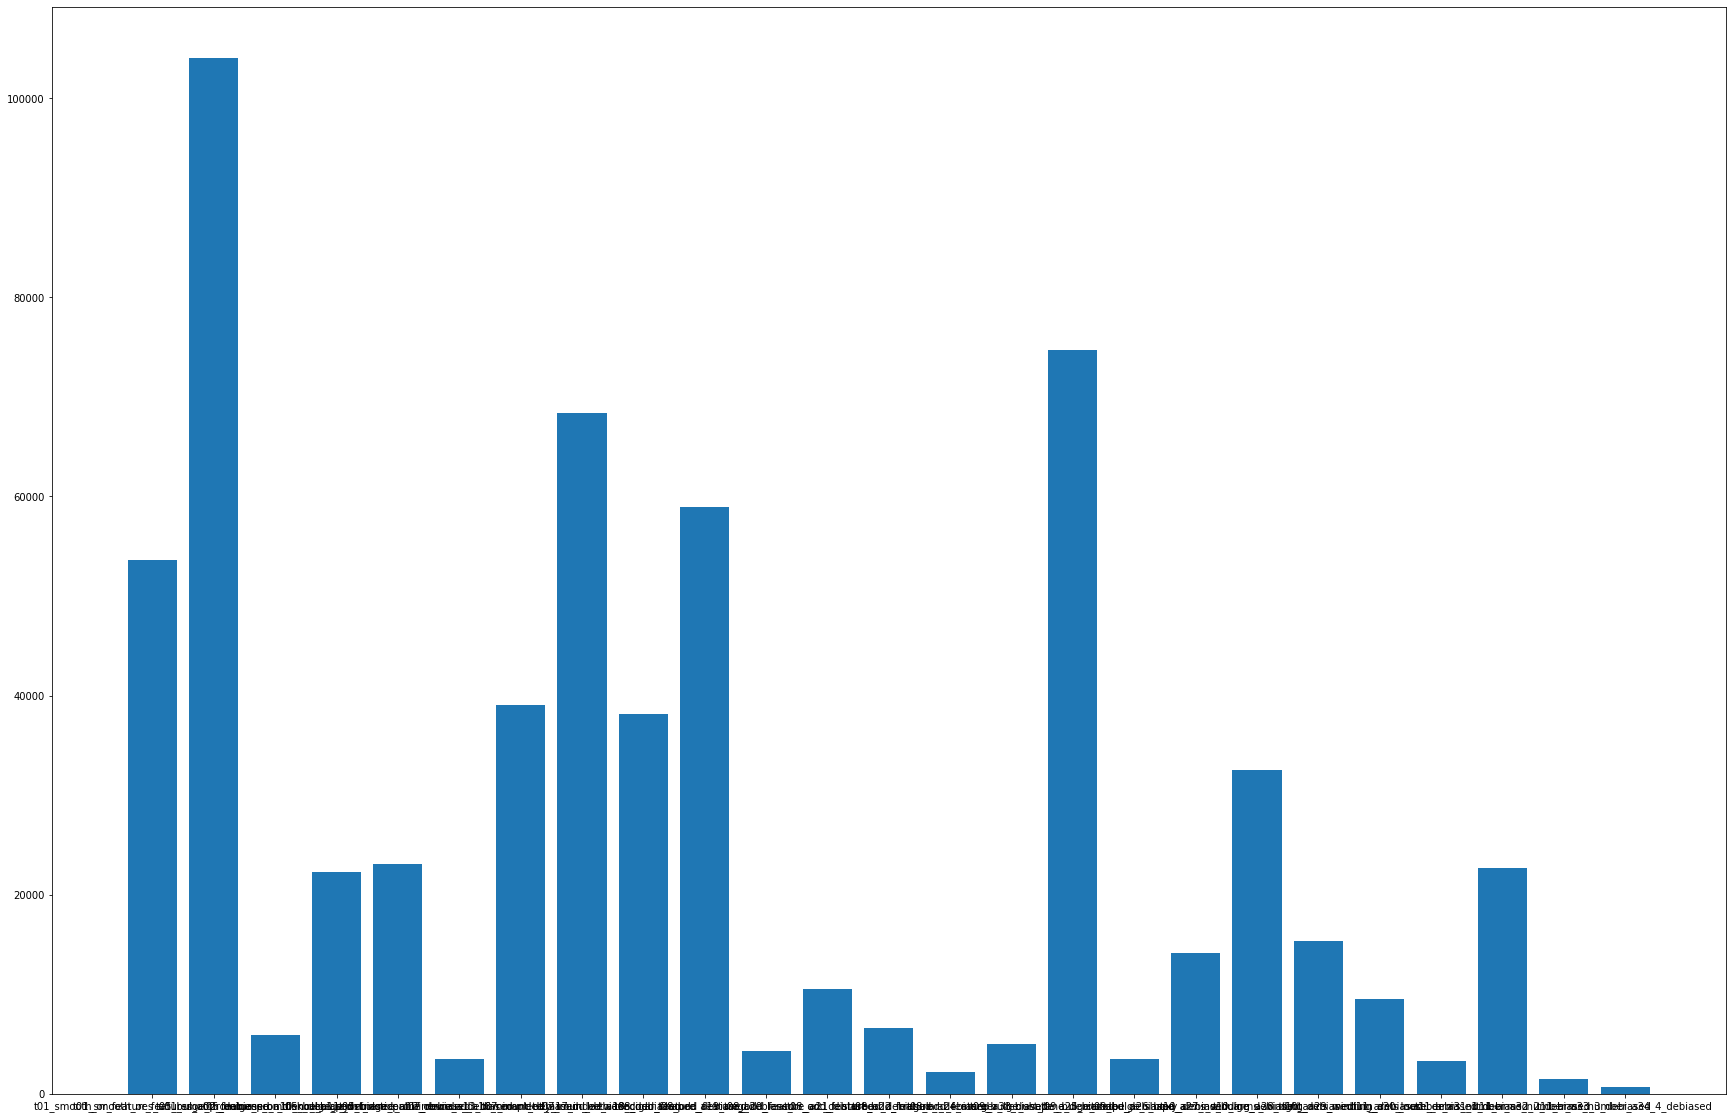

In [14]:
groups = {}
for galaxy_type in GALAXY_TYPES:
    groups[galaxy_type] = df_clean[galaxy_type][df_clean[galaxy_type] > 0.8].count()
galaxy_types = list(groups.keys())
number_galaxies = list(groups.values())
plt.figure(figsize=(30, 20))
plt.title(fontsize=15, color="green")
plt.bar(range(len(groups)),number_galaxies,tick_label=galaxy_types)
#plt.savefig('bar.png')
plt.show()

In [10]:
GALAXY_TYPES = [
    't01_smooth_or_features_a01_smooth_debiased',
    't01_smooth_or_features_a02_features_or_disk_debiased',
    't05_bulge_prominence_a10_no_bulge_debiased',
    't05_bulge_prominence_a11_just_noticeable_debiased',
    't05_bulge_prominence_a12_obvious_debiased',
    't05_bulge_prominence_a13_dominant_debiased',
    't07_rounded_a16_completely_round_debiased',
    't07_rounded_a17_in_between_debiased',
    't07_rounded_a18_cigar_shaped_debiased',
    't08_odd_feature_a19_ring_debiased',
    't08_odd_feature_a20_lens_or_arc_debiased',
    't08_odd_feature_a21_disturbed_debiased',
    't08_odd_feature_a22_irregular_debiased',
    't08_odd_feature_a24_merger_debiased',
    't08_odd_feature_a38_dust_lane_debiased',
    't09_bulge_shape_a25_rounded_debiased',
    't09_bulge_shape_a26_boxy_debiased',
    't09_bulge_shape_a27_no_bulge_debiased',
    't10_arms_winding_a28_tight_debiased',
    't10_arms_winding_a29_medium_debiased',
    't10_arms_winding_a30_loose_debiased',
    't11_arms_number_a31_1_debiased',
    't11_arms_number_a32_2_debiased',
    't11_arms_number_a33_3_debiased',
    't11_arms_number_a34_4_debiased'
]